In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

data = [[0.2,3.4],
        [0.4,3.5],
        [0.6,4.2],
        [0.9,4.2]]
data = np.array(data)
data

array([[0.2, 3.4],
       [0.4, 3.5],
       [0.6, 4.2],
       [0.9, 4.2]])

In [4]:
data_x = []
data_y = []
for i in range(0,len(data)):
    data_x.append(data[i][0])
for i in range(0,len(data)):
    data_y.append(data[i][1])
data_x=np.array(data_x)
data_y=np.array(data_y)

In [5]:
m = 1
c = -1
iter = 1
epochs = 10000
alpha = 0.1
ns = len(data)
error = []
vm = 0
vc = 0
moment = 0.9

In [6]:
# while loop is runned until iter reaches epochs
while (iter<=epochs):
  # running for loop to calculate and update model parameters for each sample
  for i in range(0,len(data)):

    #  calculating error and storing in an list
    err = (0.5) * ((data_y[i] - (m * data_x[i]) - c))**2
    error.append(err)

    # calculating derivatives of m and c
    der_m = (-1) * (data_y[i] - ((m+(moment*vm))*data_x[i]) - (c+(moment*vc)))*(data_x[i])
    der_c = (-1) * (data_y[i] - ((m+(moment*vm))*data_x[i]) - (c+(moment*vc)))
    # print("derivatives at ",i,"   ",der_m,der_c)

    # calculating change in m and c
    vm = (moment * vm) - (alpha * der_m)
    vc = (moment * vc) - (alpha * der_c)
    # print("changes at ",i,vm,vc)

    #updating m and c
    m = m + vm
    c = c + vc
    # print("values at",i,m,c)

    #incrementing no of iterations
  iter = iter + 1
 

  
print(m,c)

1.2775635695466476 3.1594289363550168


In [7]:
mse = 0
for i in range(0,len(data_x)):
  mse += (data_y[i] - (m*data_x[i]) - c)**2

mse = mse/len(data)
mse

0.029076130427402768

In [8]:

pred = []
# predictions of training data
print("predicted"," original")
for i in range(0,len(data)):
  pred.append(m*data_x[i] + c)

pred

predicted  original


[3.414941650264346, 3.670454364173676, 3.9259670780830054, 4.309236148947]

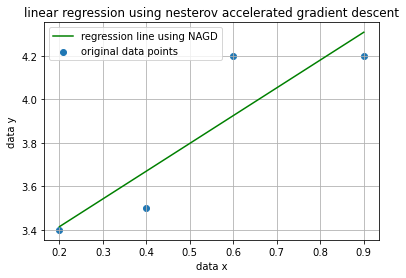

In [9]:
plt.scatter(data_x,data_y,label="original data points")
plt.plot(data_x,pred,'green',label="regression line using NAGD")
plt.legend()
plt.grid()
plt.title("linear regression using nesterov accelerated gradient descent")
plt.xlabel("data x")
plt.ylabel("data y")
plt.show()